#### **Question No.1.** NLP Dataset: This is a dataset containing 60,000 Stack Overflow questions from 2016-2020. Questions are classified into three categories. Please find your dataset from the link - https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate (Links to an external site.)


1. **Import Libraries/Dataset**
Import the required libraries and the dataset (use Google Drive if required).
Check the GPU available (recommended- use free GPU provided by Google Colab).
 

2. **Data Visualization)**
Print at least two records from each class of the dataset, for a sanity check that labels match the text.
Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)
Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
Print the shapes of train and test data.
 

3. **Data Pre-processing**
Need for this Step- Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
Please usethis pre-trained embedding layer  (Links to an external site.)from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.
Bring the train and test data in the required format.
 

4. **Model Building** 
Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
Add L2 regularization to all the layers.
Add one layer of dropout at the appropriate position and give reasons.
Choose the appropriate activation function for all the layers.
Print the model summary.
 

5. **Model Compilation**
Compile the model with the appropriate loss function.
Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
Use accuracy as a metric.
 

6. **Model Training**
Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.
 

7. **Model Evaluation**
Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
Print the two most incorrectly classified records for each class in the test dataset.
 

**Hyperparameter Tuning**- Build two more models by changing the following hyperparameters one at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model

***Regularization***: Train a model without regularization
***Dropout***: Change the position and value of dropout layer
Write a comparison between each model and give reasons for the difference in results.

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf
from keras.regularizers import l2
%matplotlib inline

Uploading file train.csv and valid.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving valid.csv to valid.csv


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d imoore/60k-stack-overflow-questions-with-quality-rate
!unzip /content/60k-stack-overflow-questions-with-quality-rate.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open /content/60k-stack-overflow-questions-with-quality-rate.zip, /content/60k-stack-overflow-questions-with-quality-rate.zip.zip or /content/60k-stack-overflow-questions-with-quality-rate.zip.ZIP.


In [ ]:
train_data = pd.read_csv("train.csv")
val_data = pd.read_csv("valid.csv")

In [ ]:
print("Shape of train data", train_data.shape)
print("Shape of valid data", val_data.shape)

Shape of train data (45000, 6)
Shape of valid data (15000, 6)


In [ ]:
train_data.head(2)

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ


Extracting unique labels 

In [ ]:
Y_labels = train_data["Y"]
unq_labels = list(Y_labels.unique())


Organizing data to display information

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
for cls in unq_labels: 
  filter = train_data[train_data["Y"] == cls]
  print(filter.head(4))

          Id                                              Title  \
0   34552656             Java: Repeat Task Every Random Seconds   
5   34554026  Accessing pointer member of the structure usin...   
11  34555643            What's the best way to store text data?   
21  34559616          how to make sure a file's integrity in C#   

                                                 Body  \
0   <p>I'm already familiar with repeating tasks e...   
5   <p>I have defined integer pointer inside the s...   
11  <p>I am kinda new to Android development, but ...   
21  <p>I am deploying a file along with a C# appli...   

                              Tags         CreationDate         Y  
0                   <java><repeat>  2016-01-01 00:21:59  LQ_CLOSE  
5   <c><pointers><data-structures>  2016-01-01 06:21:17  LQ_CLOSE  
11         <android><android-file>  2016-01-01 11:15:21  LQ_CLOSE  
21                      <c#><.net>  2016-01-01 20:10:18  LQ_CLOSE  
         Id                           

Distribution of the data with respect to target label

In [ ]:
dist = train_data.Y.value_counts()
print(dist)

LQ_CLOSE    15000
LQ_EDIT     15000
HQ          15000
Name: Y, dtype: int64


Plotting data labels distribution 

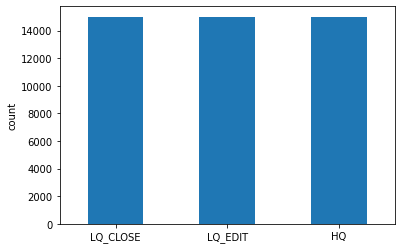

In [ ]:
dist.plot(kind='bar', rot=0, ylabel='count')
plt.show()

Converting text data to lower case

In [ ]:
train_data['Title'] = train_data['Title'].apply(lambda x: x.lower())
train_data['Body'] = train_data['Body'].apply(lambda x: x.lower())
val_data['Title'] = val_data['Title'].apply(lambda x: x.lower())
val_data['Body'] = val_data['Body'].apply(lambda x: x.lower())

In [ ]:
from bs4 import BeautifulSoup
import re

Stripping and Cleaning data as HTML tag is not required, therefore, removing them also

In [ ]:
def strip_tags(markup):
    bs = BeautifulSoup(markup, 'html.parser')
    return bs.get_text()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^(a-zA-Z)\s]','', text)
    return text

train_data['Title'] = train_data['Title'].apply(clean_text)
train_data['Body'] = train_data['Body'].apply(clean_text)
val_data['Title'] = val_data['Title'].apply(clean_text)
val_data['Body'] = val_data['Body'].apply(clean_text)

In [ ]:
train_data["Body"].head()

0    pim already familiar with repeating tasks ever...
1    pid like to understand why java  optionals wer...
2    pi am attempting to overlay a title over an im...
3    pthe question is very simple but i just could ...
4    pim using custom floatingactionmenu i need to ...
Name: Body, dtype: object

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download("punkt")
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Tokenizing and Removing Stop Words from data set

In [ ]:
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence).strip("'")
            
train_data["Title"] = train_data['Title'].apply(remove_stopwords)
train_data["Body"] = train_data['Body'].apply(remove_stopwords)
val_data["Title"] = val_data['Title'].apply(remove_stopwords)
val_data["Body"] = val_data['Body'].apply(remove_stopwords)

In [ ]:
train_data["Content"] = train_data["Title"] + " " + train_data["Body"]

In [ ]:
val_data["Content"] = val_data["Title"] + " " + val_data["Body"]

In [ ]:
train_df = train_data.drop(columns=['Title', "Body", 'Tags', 'CreationDate'])
val_df = val_data.drop(columns=['Title', "Body", 'Tags', 'CreationDate'])

In [ ]:
train_df.head()

,Id,Y,Content
0,34552656,LQ_CLOSE,java repeat task every random seconds pim alre...
1,34553034,HQ,java optionals immutable pid like understand j...
2,34553174,HQ,text overlay image darkened opacity react nati...
3,34553318,HQ,ternary operator swift picky pthe question sim...
4,34553755,HQ,hideshow fab scale animation pim using custom ...


In [ ]:
train_df.Y = pd.Categorical(train_df.Y)
val_df.Y = pd.Categorical(val_df.Y)

In [ ]:
train_df['Y_code'] = train_df.Y.cat.codes
val_df['Y_code'] = val_df.Y.cat.codes

In [ ]:
train_df = train_df.drop(columns=['Y', "Id"])
val_df = val_df.drop(columns=['Y', "Id"])

Using this pre-trained embedding layer from TensorFlow hub to convert string data to tensor required format

In [ ]:
embedModel = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")

In [ ]:
train_df["Content-encoded"] = train_df['Content'].apply(lambda x: embedModel([x]))
val_df["Content-encoded"] = val_df["Content"].apply(lambda x: embedModel([x]))

In [ ]:
train_df["Content-encoded"] = train_df["Content-encoded"].apply(lambda x: x.numpy())
val_df["Content-encoded"] = val_df["Content-encoded"].apply(lambda x: x.numpy())

In [ ]:
train_df["Content-encoded"] = train_df["Content-encoded"].apply(lambda x: x[0])
val_df["Content-encoded"] = val_df["Content-encoded"].apply(lambda x: x[0])

In [ ]:
X_train = np.array([i for i in train_df["Content-encoded"]])
X_Val = np.array([i for i in val_df["Content-encoded"]])

Encoding Target Variable

In [ ]:
Y_train = tf.keras.utils.to_categorical(train_df["Y_code"])
Y_val = tf.keras.utils.to_categorical(val_df["Y_code"])

#### ***Utility methods to reuse the code***

Method to calculate the learning v/s loss, it will be used with history params 

In [ ]:
def calc_learning_vs_loss(hist, desc):
  # Plot the learning rate versus the loss
  lrs = 1e-4 * (10 ** (np.arange(max(hist.epoch)+1)/20))
  plt.figure(figsize=(10, 10))
  plt.semilogx(lrs, hist.history["loss"]) # we want the x-axis (learning rate) to be log scale
  plt.xlabel("Learning Rate" + desc)
  plt.ylabel("Loss")
  plt.title("Learning rate vs. loss");

Method to plot confusion matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def display_confusion_matrix(ytest, ypred, title):
  #cm = confusion_matrix(ytest, tf.round(ypred))
  cm = confusion_matrix(ytest.argmax(axis=1),ypred.argmax(axis=1)) 
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.title(title)
  plt.show()

---
### To understand the behaviour of neural network, we are creating 3 Models with following properties

## Below are the details and approach of MODEL 1

* **Model 1** 
  * Model 1 is a model containing 3 layers without regularization and dropout to test the behaviour of input data with simple model. It helps to explore the data from different aspect
  * We are passing dynamic variable to methods created to perform modelling on **Model 1**
  * Based on the results we will be plotting information of attributes which will be having best performance 

Creating method to create model with following properties
1. 3 Hidden layer support
2. dynamic optimizer, learning rate & epochs 
3. No regularization and dropout
**Note** This method is used to analyze the behaviour without regularization and dropout. Apart from it optimizers, learning rate and epochs will be dynamic to analyse the behaviour of the network

In [ ]:
def model1(layer1, layer2, layer3, opt, lr, e, batchsiz):
  print("Performing for:", layer1, layer2, layer3, opt, lr, e, batchsiz)

  # Set random seed
  tf.random.set_seed(42)

  # Replicate original model
  model = tf.keras.Sequential([
    ## layer 1 with hidden nodes
    tf.keras.layers.Dense(layer1, activation="relu", input_shape=(128,)),
    
    ## layer 2 with hidden nodes
    tf.keras.layers.Dense(layer2, activation="relu"),

    ## layer 3 with hidden nodes
    tf.keras.layers.Dense(layer3, activation="relu"),

    ##output layer with ternary  clasification
    tf.keras.layers.Dense(3, activation="softmax") 
  ])

  if (opt == "Adam"):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

  # Compile the model 
  model.compile(loss="categorical_crossentropy",
                optimizer=optimizer, 
                metrics=["accuracy"])

  # Fit the model
  history = model.fit(X_train, Y_train, epochs=e, verbose=0, batch_size=batchsiz)
  
  # Evaluate model on the test dataset
  eval = model.evaluate(X_Val, Y_val)

  return history, model, eval

**Execute model to compile, fit and evaluate using following configuration:**
1. 128, 64, 32, 16, 8 nodes of 3 hidden layer used
2. Adam & SGD optimizers are used dynamically
3. dynamically learning rate & epochs are changing

In [ ]:
m1_hist0A, m1_model0A, m1_eval0A = model1(128, 64, 32, "Adam", 0.0001, 50, 300)
m1_hist0AA, m1_model0AA, m1_eval0AA = model1(128, 64, 32, "Adam", 0.0001, 50, 1000)

m1_hist1A, m1_model1A, m1_eval1A = model1(128, 64, 32, "SGD", 0.001, 30, 1500)
m1_hist1AA, m1_model1AA, m1_eval1AA = model1(128, 64, 32, "SGD", 0.001, 30, 2000)

m1_hist2A, m1_model2A, m1_eval2A = model1(128, 32, 16, "Adam", 1, 10, 100)
m1_hist2AA, m1_model2AA, m1_eval2AA = model1(128, 32, 16, "Adam", 1, 10, 2000)

m1_hist3A, m1_model3A, m1_eval3A = model1(128, 32, 8, "SGD", 0.003, 100, 800)
m1_hist3AA, m1_model3AA, m1_eval3AA = model1(128, 32, 8, "SGD", 0.003, 100, 1800)

m1_hist4A, m1_model4A, m1_eval4A = model1(128, 64, 8, "SGD",  0.0001, 60, 1600)
m1_hist4AA, m1_model4AA, m1_eval4AA = model1(128, 64, 8, "SGD",  0.0001, 60,  2600)

Performing for: 128 64 32 Adam 0.0001 50 300
469/469 [==============================] - 1s 2ms/step - loss: 0.6647 - accuracy: 0.7103
Performing for: 128 64 32 Adam 0.0001 50 1000
469/469 [==============================] - 1s 1ms/step - loss: 0.6834 - accuracy: 0.7024
Performing for: 128 64 32 SGD 0.001 30 1500
469/469 [==============================] - 1s 1ms/step - loss: 1.0929 - accuracy: 0.3856
Performing for: 128 64 32 SGD 0.001 30 2000
469/469 [==============================] - 1s 1ms/step - loss: 1.0944 - accuracy: 0.3763
Performing for: 128 32 16 Adam 1 10 100
469/469 [==============================] - 1s 1ms/step - loss: 1.1027 - accuracy: 0.3333
Performing for: 128 32 16 Adam 1 10 2000
469/469 [==============================] - 1s 1ms/step - loss: 1.0994 - accuracy: 0.3333
Performing for: 128 32 8 SGD 0.003 100 800
469/469 [==============================] - 1s 1ms/step - loss: 0.9338 - accuracy: 0.5851
Performing for: 128 32 8 SGD 0.003 100 1800
469/469 [=====================

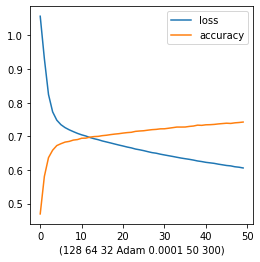

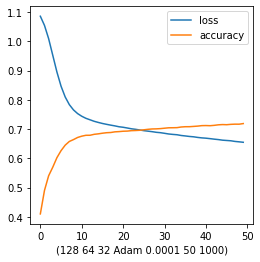

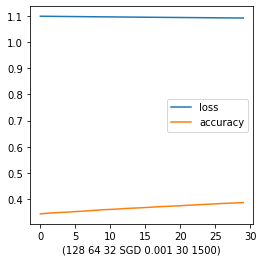

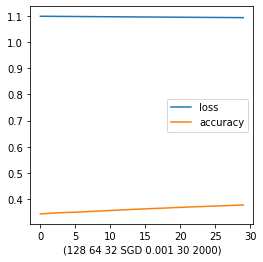

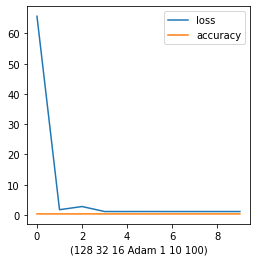

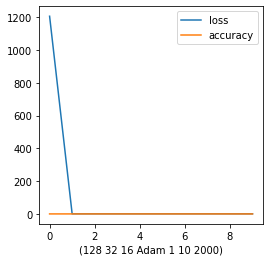

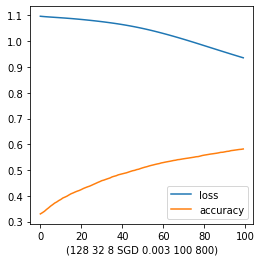

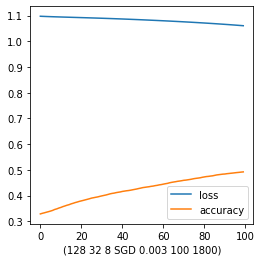

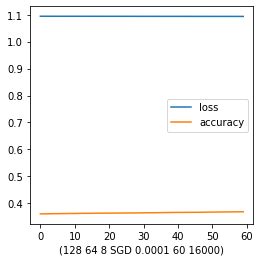

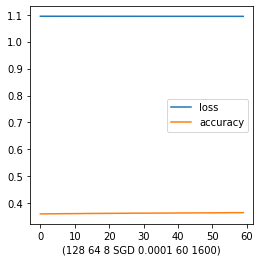

In [ ]:
pd.DataFrame(m1_hist0A.history).plot(figsize=(4,4), xlabel="(128 64 32 Adam 0.0001 50 300)");
pd.DataFrame(m1_hist0AA.history).plot(figsize=(4,4), xlabel="(128 64 32 Adam 0.0001 50 1000)");

pd.DataFrame(m1_hist1A.history).plot(figsize=(4,4), xlabel="(128 64 32 SGD 0.001 30 1500)");
pd.DataFrame(m1_hist1AA.history).plot(figsize=(4,4), xlabel="(128 64 32 SGD 0.001 30 2000)");

pd.DataFrame(m1_hist2A.history).plot(figsize=(4,4), xlabel="(128 32 16 Adam 1 10 100)");
pd.DataFrame(m1_hist2AA.history).plot(figsize=(4,4), xlabel="(128 32 16 Adam 1 10 2000)");

pd.DataFrame(m1_hist3A.history).plot(figsize=(4,4), xlabel="(128 32 8 SGD 0.003 100 800)");
pd.DataFrame(m1_hist3AA.history).plot(figsize=(4,4), xlabel="(128 32 8 SGD 0.003 100 1800)");

pd.DataFrame(m1_hist4A.history).plot(figsize=(4,4), xlabel="(128 64 8 SGD 0.0001 60 16000)");
pd.DataFrame(m1_hist4AA.history).plot(figsize=(4,4), xlabel="(128 64 8 SGD 0.0001 60 1600)");

In [ ]:
m1_hist0, m1_model0, m1_eval0 = model1(256, 128, 64, "Adam", 0.0001, 50,1000)
m1_hist1, m1_model1, m1_eval1 = model1(256, 128, 64, "Adam", 0.001, 30, 2000)
m1_hist2, m1_model2, m1_eval2 = model1(256, 128, 64, "Adam", 1, 10, 1500)
m1_hist3, m1_model3, m1_eval3 = model1(256, 128, 64, "Adam", 0.003, 100, 1800)
m1_hist4, m1_model4, m1_eval4 = model1(512, 256, 64, "SGD",  0.0001, 60, 2200)
m1_hist5, m1_model5, m1_eval5 = model1(256, 128, 64, "SGD",  0.001, 20, 2500)
m1_hist6, m1_model6, m1_eval6 = model1(256, 128, 64, "SGD",  1, 30,2800)
m1_hist7, m1_model7, m1_eval7 = model1(256, 128, 64, "SGD",  0.003, 80, 3000)
m1_hist8, m1_model8, m1_eval8 = model1(256, 128, 64, "Adam", 0.001, 70, 3200)
m1_hist9, m1_model9, m1_eval9 = model1(256, 128, 64, "SGD",  0.1, 60, 3500)
m1_hist10, m1_model10, m1_eval10 = model1(1024, 512, 256, "Adam", 0.0001, 90, 3700)
m1_hist11, m1_model11, m1_eval11 = model1(256, 128, 64, "Adam", 0.001, 40, 2900)
m1_hist12, m1_model12, m1_eval12 = model1(512, 128, 64, "Adam", 1, 100, 5000)
m1_hist13, m1_model13, m1_eval13 = model1(256, 128, 64, "Adam", 0.003, 30, 3000)
m1_hist14, m1_model14, m1_eval14 = model1(256, 128, 64, "SGD",  0.0001, 20, 5500)
m1_hist15, m1_model15, m1_eval15 = model1(128, 64, 32, "SGD",  0.001, 10, 7000)
m1_hist16, m1_model16, m1_eval16 = model1(256, 128, 64, "SGD",  0.01, 10, 3100)
m1_hist17, m1_model17, m1_eval17 = model1(256, 128, 64, "SGD",  0.003, 10, 2400)
m1_hist18, m1_model18, m1_eval18 = model1(256, 128, 64, "Adam", 0.1, 10,4200)
m1_hist19, m1_model19, m1_eval19 = model1(256, 128, 64, "SGD",  0.001, 10,3200)
m1_hist20,	m1_model20, m1_eval20 = model1( 256,64,32, "SGD", 0.001, 100,4400) 
m1_hist21,	m1_model21, m1_eval21 = model1( 512,128,32, "Adam", 0.01, 30,200)
m1_hist22,	m1_model22, m1_eval22 = model1( 256,64,32, "Adam", 0.001, 50, 4000)
m1_hist23,	m1_model23, m1_eval23 = model1( 256,64,32, "SGD", 0.004, 70,1900)
m1_hist24,	m1_model24, m1_eval24 = model1( 256,64,32, "Adam", 0.001, 10, 5100)
m1_hist25,	m1_model25, m1_eval25 = model1( 32,16,8, "SGD", 0.03, 80, 2300)
m1_hist26,	m1_model26, m1_eval26 = model1( 256,64,32, "Adam", 0.001, 90, 1900)
m1_hist27,	m1_model27, m1_eval27 = model1( 1024,64,32, "SGD", 0.01, 100, 4400)
m1_hist28,	m1_model28, m1_eval28 = model1( 256,64,32, "Adam", 0.05, 40, 5700)
m1_hist29,	m1_model29, m1_eval29 = model1( 1024,512,256, "SGD", 0.003, 100, 2000)
m1_hist30,	m1_model30, m1_eval30 = model1( 256,64,32, "Adam", 0.001, 50, 510)


Performing for: 256 128 64 Adam 0.0001 50 1000
469/469 [==============================] - 1s 1ms/step - loss: 0.6651 - accuracy: 0.7121
Performing for: 256 128 64 Adam 0.001 30 2000
469/469 [==============================] - 1s 1ms/step - loss: 0.6826 - accuracy: 0.7227
Performing for: 256 128 64 Adam 1 10 1500
469/469 [==============================] - 1s 1ms/step - loss: 5.8710 - accuracy: 0.3335
Performing for: 256 128 64 Adam 0.003 100 1800
469/469 [==============================] - 1s 1ms/step - loss: 3.3881 - accuracy: 0.6851
Performing for: 512 256 64 SGD 0.0001 60 2200
469/469 [==============================] - 1s 2ms/step - loss: 1.1013 - accuracy: 0.3373
Performing for: 256 128 64 SGD 0.001 20 2500
469/469 [==============================] - 1s 1ms/step - loss: 1.0923 - accuracy: 0.3835
Performing for: 256 128 64 SGD 1 30 2800
469/469 [==============================] - 1s 1ms/step - loss: 0.7506 - accuracy: 0.6530
Performing for: 256 128 64 SGD 0.003 80 3000
469/469 [=========

**Note** Describe the result of above model 1

#### Prediction for model 1

In [ ]:
m1_y_preds0=m1_model0.predict(X_Val)
m1_y_preds1=m1_model1.predict(X_Val)
m1_y_preds2=m1_model2.predict(X_Val)
m1_y_preds3=m1_model3.predict(X_Val)
m1_y_preds4=m1_model4.predict(X_Val)
m1_y_preds5=m1_model5.predict(X_Val)
m1_y_preds6=m1_model6.predict(X_Val)
m1_y_preds7=m1_model7.predict(X_Val)
m1_y_preds8=m1_model8.predict(X_Val)
m1_y_preds9=m1_model9.predict(X_Val)
m1_y_preds10=m1_model10.predict(X_Val)
m1_y_preds11=m1_model11.predict(X_Val)
m1_y_preds12=m1_model12.predict(X_Val)
m1_y_preds13=m1_model13.predict(X_Val)
m1_y_preds14=m1_model14.predict(X_Val)
m1_y_preds15=m1_model15.predict(X_Val)
m1_y_preds16=m1_model16.predict(X_Val)
m1_y_preds17=m1_model17.predict(X_Val)
m1_y_preds18=m1_model18.predict(X_Val)
m1_y_preds19=m1_model19.predict(X_Val)
m1_y_preds20 = m1_model20.predict(X_Val)
m1_y_preds21 = m1_model21.predict(X_Val)
m1_y_preds22 = m1_model22.predict(X_Val)
m1_y_preds23 = m1_model23.predict(X_Val)
m1_y_preds24 = m1_model24.predict(X_Val)
m1_y_preds25 = m1_model25.predict(X_Val)
m1_y_preds26 = m1_model26.predict(X_Val)
m1_y_preds27 = m1_model27.predict(X_Val)
m1_y_preds28 = m1_model28.predict(X_Val)
m1_y_preds29 = m1_model29.predict(X_Val)
m1_y_preds30 = m1_model30.predict(X_Val)

Plotting History, Learning v/s Loss and Confusion Matrix of Best Attributes used in neural network

Below are the plots for **Adam Optimizer** which are observed with best **ACCURACY** for ***Model 1***

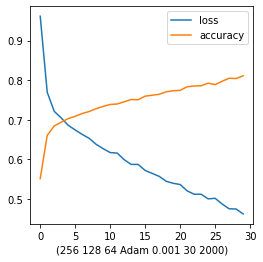

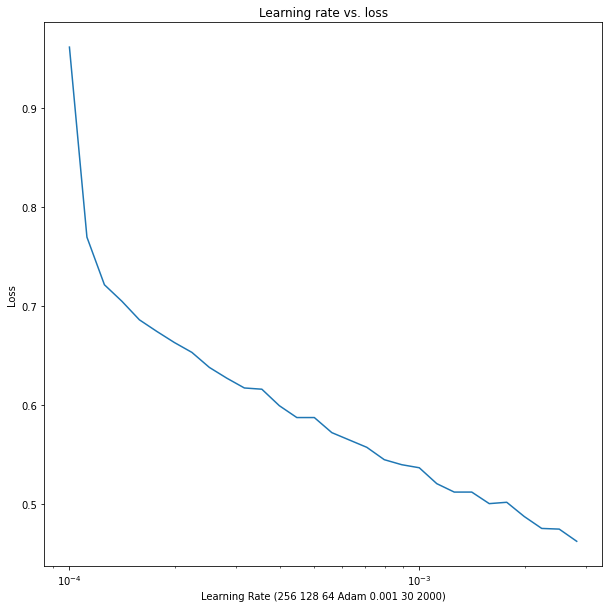

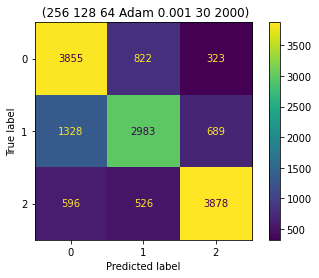

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.734159,0.723000,0.728537,5000
1,0.688755,0.596600,0.639374,5000
2,0.793047,0.775600,0.784226,5000
micro avg,0.740615,0.698400,0.718888,15000
macro avg,0.738654,0.698400,0.717379,15000
weighted avg,0.738654,0.698400,0.717379,15000
samples avg,0.698400,0.698400,0.698400,15000


In [ ]:
# Checkout the history  m1_hist0
pd.DataFrame(m1_hist1.history).plot(figsize=(4,4), xlabel="(256 128 64 Adam 0.001 30 2000)");
calc_learning_vs_loss(m1_hist1, " (256 128 64 Adam 0.001 30 2000)")
display_confusion_matrix(Y_val, tf.round(m1_y_preds1).numpy(), " (256 128 64 Adam 0.001 30 2000)")

#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(Y_val, 
                                        tf.round(m1_y_preds1).numpy(), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis')

Below are the plots for **SGD Optimizer** which are observed with best **ACCURACY** for ***Model 1***, although lesser than Adam optimizer

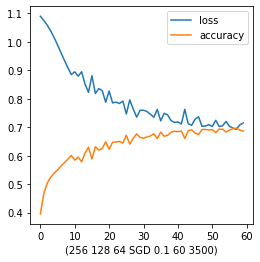

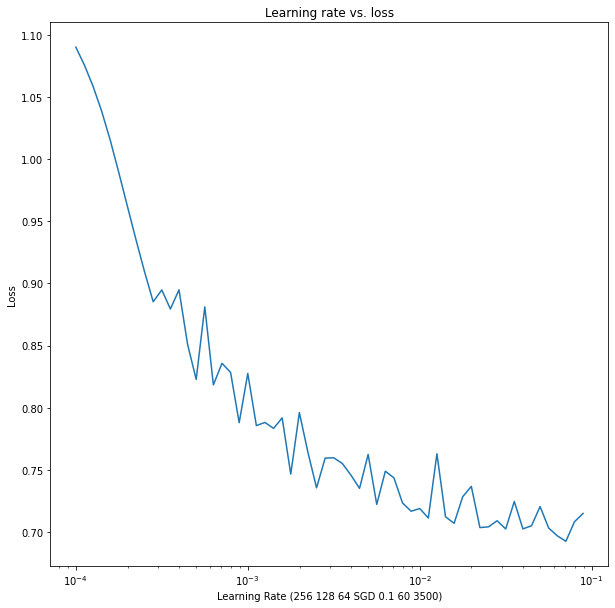

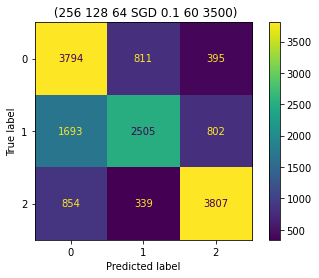

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.744298,0.620000,0.676487,5000
1,0.685363,0.501000,0.578856,5000
2,0.760791,0.761400,0.761096,5000
micro avg,0.733936,0.627467,0.676538,15000
macro avg,0.730151,0.627467,0.672146,15000
weighted avg,0.730151,0.627467,0.672146,15000
samples avg,0.627467,0.627467,0.627467,15000


In [ ]:
# Checkout the history  m1_hist0
pd.DataFrame(m1_hist9.history).plot(figsize=(4,4), xlabel="(256 128 64 SGD 0.1 60 3500)");
calc_learning_vs_loss(m1_hist9, " (256 128 64 SGD 0.1 60 3500)")
display_confusion_matrix(Y_val, tf.round(m1_y_preds9).numpy(), " (256 128 64 SGD 0.1 60 3500)")

#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(Y_val, 
                                        tf.round(m1_y_preds9).numpy(), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis')

### **Results Remarks of Model 1** 
The best result observed in various execution of model with various attributes & parameters. In this analysis we have got the best of result with following configuration/parameters
1. **Adam Optimizer** 
> * Hidden Layer combination is **L1: 256, L2:128, L3:64**
> * Learning rate: 0.001
> * Epochs: 30
> * Batch size: 2000
> * **ACCURACY**: 72.27%

2. **SGD**
> * Hidden Layer combination is **L1: 256, L2:128, L3:64** 
> * Learning rate: 0.1
> * Epochs: 60
> * Batchsize: 3500
> * **ACCURACY**: 69.23%



# **CONCLUSION OF MODEL 1**

After various execution of epochs & different optimizer & learning rate we have observed.

1. Learning rate is crucial part with all optimizer and epochs
2. This is not necessary that by increasing number of epochs only, we will get better accuracy in the model.
3. Combination of optimizers, learning rate and epochs impacts the model accuracy.

So far, it is observed for ***Model 1*** without the configuration of explicit regularization and dropout, model is giving better accuracy with both the optimizers. 
Although, the structure of neural network is varied in terms neuron at each layer including the change in learning rate, batchsize and epochs.

We have observed that most of time Adam optimizer is giving better result.

Although, *the study is limited and can be further explored by varying combination of attributes of the neural network*. To perform this kind of job we have to do various changes e.g.

* Change in no. of epochs
* Change in learning rate & bactch size
* Change in optimizers
* Change in neurons count at each layer
* Change in hidden layers

---
---

## Below are the details and approach of MODEL 2

* **Model 2** 
  * Model 2 is a model containing 3 layers with regularization and without dropout to test the behaviour of input data. It helps to explore the data from different aspect
  * We are passing dynamic variable to methods created to perform modelling on **Model 2**
  * ***Based on the results we will be plotting information of attributes which will be having best performance*** 

Creating method to create model with following properties
1. 3 Hidden layer support
2. dynamic optimizer, learning rate & epochs 
3. Dynamic regularization input 
4. No dropout support
**Note** This method is used to analyze the behaviour. Apart from it optimizers, learning rate, regularization and epochs will be dynamic input to analyse the behaviour of the network

In [ ]:
def model2(layer1, layer2, layer3, opt, lr, e, l2val, batchsiz):
  print("Performing for:", layer1, layer2, layer3, opt, lr, e, l2val, batchsiz)

  # Set random seed
  tf.random.set_seed(42)

  # Replicate original model
  model = tf.keras.Sequential([
        
    ## layer 1 with hidden nodes
    tf.keras.layers.Dense(layer1, activation="relu", input_shape=(128,),  kernel_regularizer=l2(0.001), bias_regularizer=l2(l2val)),

    ## layer 2 with hidden nodes
    tf.keras.layers.Dense(layer2, activation="relu",  kernel_regularizer=l2(0.001), bias_regularizer=l2(l2val)),

    ## layer 3 with hidden nodes
    tf.keras.layers.Dense(layer3, activation="relu",  kernel_regularizer=l2(0.001), bias_regularizer=l2(l2val)),

    ##output layer with multi  classification
    tf.keras.layers.Dense(3, activation="softmax") 
  ])

  if (opt == "Adam"):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

  # Compile the model #tf.keras.optimizers.Adam(learning_rate=0.003), 
  model.compile(loss="categorical_crossentropy",
                optimizer=optimizer, 
                metrics=["accuracy"])

  # Fit the model
  history = model.fit(X_train, Y_train, epochs=e, verbose=0, batch_size=batchsiz)

  # Evaluate model on the test dataset
  eval = model.evaluate(X_Val, Y_val)

  return history, model, eval

In [ ]:

m2_hist0A, m2_model0A, m2_eval0A = model2(128, 64, 32, "Adam", 0.0001, 50, 0.01, 300)
m2_hist0AA, m2_model0AA, m2_eval0AA = model2(128, 64, 32, "Adam", 0.0001, 50, 0.01, 1000)

m2_hist1A, m2_model2A, m2_eval1A = model2(128, 64, 32, "SGD", 0.001, 30, 0.003, 1500)
m2_hist1AA, m2_model2AA, m2_eval1AA = model2(128, 64, 32, "SGD", 0.001, 30, 0.003, 2000)

m2_hist2A, m2_model2A, m2_eval2A = model2(128, 32, 16, "Adam", 1, 10, 0.001, 100)
m2_hist2AA, m2_model2AA, m2_eval2AA = model2(128, 32, 16, "Adam", 1, 10, 0.001, 2000)

m2_hist3A, m2_model3A, m2_eval3A = model2(128, 32, 8, "SGD", 0.003, 100, 0.1, 800)
m2_hist3AA, m2_model3AA, m2_eval3AA = model2(128, 32, 8, "SGD", 0.003, 100, 0.1, 1800)

m2_hist4A, m2_model4A, m2_eval4A = model2(128, 64, 8, "SGD",  0.0001, 60, 0.01, 1600)
m2_hist4AA, m2_model4AA, m2_eval4AA = model2(128, 64, 8, "SGD",  0.0001, 60, 0.01,   2600)

Performing for: 128 64 32 Adam 0.0001 50 0.01 300
469/469 [==============================] - 1s 1ms/step - loss: 0.7647 - accuracy: 0.7139
Performing for: 128 64 32 Adam 0.0001 50 0.01 1000
469/469 [==============================] - 1s 1ms/step - loss: 0.8141 - accuracy: 0.6990
Performing for: 128 64 32 SGD 0.001 30 0.003 1500
469/469 [==============================] - 1s 1ms/step - loss: 1.3480 - accuracy: 0.3857
Performing for: 128 64 32 SGD 0.001 30 0.003 2000
469/469 [==============================] - 1s 1ms/step - loss: 1.3498 - accuracy: 0.3762
Performing for: 128 32 16 Adam 1 10 0.001 100
469/469 [==============================] - 1s 1ms/step - loss: 227.8671 - accuracy: 0.3333
Performing for: 128 32 16 Adam 1 10 0.001 2000
469/469 [==============================] - 1s 1ms/step - loss: 29.5185 - accuracy: 0.3333
Performing for: 128 32 8 SGD 0.003 100 0.1 800
469/469 [==============================] - 1s 1ms/step - loss: 1.1379 - accuracy: 0.5765
Performing for: 128 32 8 SGD 0.00

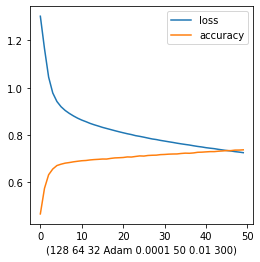

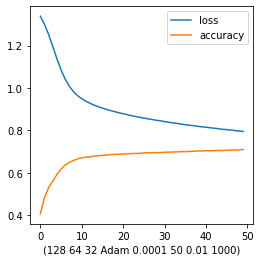

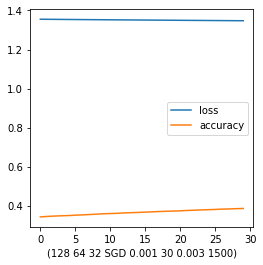

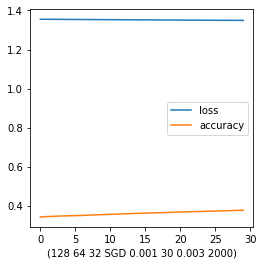

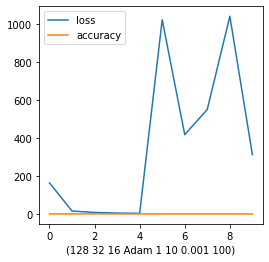

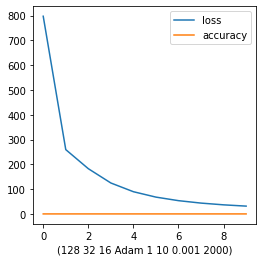

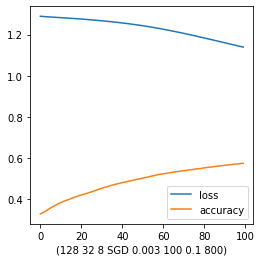

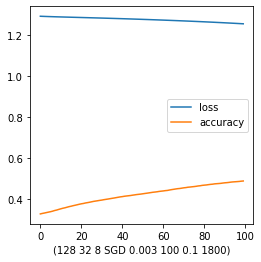

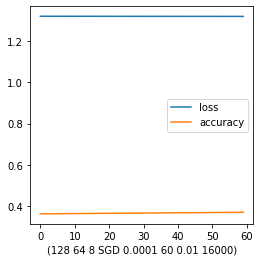

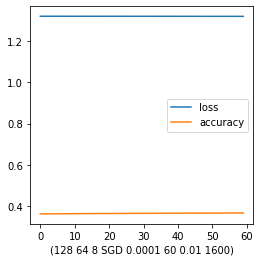

In [ ]:
pd.DataFrame(m2_hist0A.history).plot(figsize=(4,4), xlabel="(128 64 32 Adam 0.0001 50 0.01 300)");
pd.DataFrame(m2_hist0AA.history).plot(figsize=(4,4), xlabel="(128 64 32 Adam 0.0001 50 0.01 1000)");

pd.DataFrame(m2_hist1A.history).plot(figsize=(4,4), xlabel="(128 64 32 SGD 0.001 30 0.003 1500)");
pd.DataFrame(m2_hist1AA.history).plot(figsize=(4,4), xlabel="(128 64 32 SGD 0.001 30 0.003 2000)");

pd.DataFrame(m2_hist2A.history).plot(figsize=(4,4), xlabel="(128 32 16 Adam 1 10 0.001 100)");
pd.DataFrame(m2_hist2AA.history).plot(figsize=(4,4), xlabel="(128 32 16 Adam 1 10 0.001 2000)");

pd.DataFrame(m2_hist3A.history).plot(figsize=(4,4), xlabel="(128 32 8 SGD 0.003 100 0.1 800)");
pd.DataFrame(m2_hist3AA.history).plot(figsize=(4,4), xlabel="(128 32 8 SGD 0.003 100 0.1 1800)");

pd.DataFrame(m2_hist4A.history).plot(figsize=(4,4), xlabel="(128 64 8 SGD 0.0001 60 0.01 16000)");
pd.DataFrame(m2_hist4AA.history).plot(figsize=(4,4), xlabel="(128 64 8 SGD 0.0001 60 0.01 1600)");

In [ ]:
m2_hist0, m2_model0, m2_eval0 = model2(256, 128, 64, "Adam", 0.0001, 50,0.01, 300)
m2_hist1, m2_model1, m2_eval1 = model2(256, 128, 64, "Adam", 0.001, 30, 0.003, 1500)
m2_hist2, m2_model2, m2_eval2 = model2(256, 128, 64, "Adam", 1, 10,0.001, 100)
m2_hist3, m2_model3, m2_eval3 = model2(256, 128, 64, "Adam", 0.003, 100,0.01, 300)
m2_hist4, m2_model4, m2_eval4 = model2(512, 256, 64, "SGD",  0.0001, 60,0.001, 100)
m2_hist5, m2_model5, m2_eval5 = model2(256, 128, 64, "SGD",  0.001, 20,0.003, 1500)
m2_hist6, m2_model6, m2_eval6 = model2(256, 128, 64, "SGD",  1, 30, 0.01,   2600)
m2_hist7, m2_model7, m2_eval7 = model2(256, 128, 64, "SGD",  0.003, 80,0.003, 1500)
m2_hist8, m2_model8, m2_eval8 = model2(256, 128, 64, "Adam", 0.001, 70,0.01, 300)
m2_hist9, m2_model9, m2_eval9 = model2(256, 128, 64, "SGD",  0.1, 60, 0.01,   2600)
m2_hist10, m2_model10, m2_eval10 = model2(1024, 512, 256, "Adam", 0.0001, 90,0.01,   2600)
m2_hist11, m2_model11, m2_eval11 = model2(256, 128, 64, "Adam", 0.001, 40,0.03,   2600)
m2_hist12, m2_model12, m2_eval12 = model2(512, 128, 64, "Adam", 1, 100,0.01, 300)
m2_hist13, m2_model13, m2_eval13 = model2(256, 128, 64, "Adam", 0.003, 30,0.01,   2600)
m2_hist14, m2_model14, m2_eval14 = model2(256, 128, 64, "SGD",  0.0001, 20,0.003, 1500)
m2_hist15, m2_model15, m2_eval15 = model2(128, 64, 32, "SGD",  0.001, 10,0.01,   2600)
m2_hist16, m2_model16, m2_eval16 = model2(256, 128, 64, "SGD",  0.01, 10,0.01, 300)
m2_hist17, m2_model17, m2_eval17 = model2(256, 128, 64, "SGD",  0.003, 10,0.001,   2600)
m2_hist18, m2_model18, m2_eval18 = model2(256, 128, 64, "Adam", 0.1, 10,0.001, 100)
m2_hist19, m2_model19, m2_eval19 = model2(256, 128, 64, "SGD",  0.001, 10,0.01, 300)
m2_hist20,	m2_model20, m2_eval20 = model2( 256,64,32, "SGD", 0.001, 100,0.001, 100) 
m2_hist21,	m2_model21, m2_eval21 = model2( 512,128,32, "Adam", 0.001, 30,0.003, 1500)
m2_hist22,	m2_model22, m2_eval22 = model2( 256,64,32, "Adam", 0.001, 50,0.01, 300)
m2_hist23,	m2_model23, m2_eval23 = model2( 256,64,32, "SGD", 0.001, 70,0.003,   2600)
m2_hist24,	m2_model24, m2_eval24 = model2( 256,64,32, "Adam", 0.001, 10,0.01, 300)
m2_hist25,	m2_model25, m2_eval25 = model2( 32,16,8, "SGD", 0.001, 80,0.001, 100)
m2_hist26,	m2_model26, m2_eval26 = model2( 256,64,32, "Adam", 0.001, 90,0.01,   2600)
m2_hist27,	m2_model27, m2_eval27 = model2( 1024,64,32, "SGD", 0.001, 100,0.01, 300)
m2_hist28,	m2_model28, m2_eval28 = model2( 256,64,32, "Adam", 0.001, 40,0.01,   2600)
m2_hist29,	m2_model29, m2_eval29 = model2( 1024,512,256, "SGD", 0.001, 100,0.01,   2600)
m2_hist30,	m2_model30, m2_eval30 = model2( 256,64,32, "Adam", 0.001, 50,0.01, 300)

Performing for: 256 128 64 Adam 0.0001 50 0.01 300
469/469 [==============================] - 1s 2ms/step - loss: 0.7727 - accuracy: 0.7217
Performing for: 256 128 64 Adam 0.001 30 0.003 1500
469/469 [==============================] - 1s 2ms/step - loss: 0.7470 - accuracy: 0.7301
Performing for: 256 128 64 Adam 1 10 0.001 100
469/469 [==============================] - 1s 2ms/step - loss: 449.2248 - accuracy: 0.3334
Performing for: 256 128 64 Adam 0.003 100 0.01 300
469/469 [==============================] - 1s 2ms/step - loss: 0.7789 - accuracy: 0.7093
Performing for: 512 256 64 SGD 0.0001 60 0.001 100
469/469 [==============================] - 1s 2ms/step - loss: 1.6925 - accuracy: 0.5115
Performing for: 256 128 64 SGD 0.001 20 0.003 1500
469/469 [==============================] - 1s 2ms/step - loss: 1.5138 - accuracy: 0.4007
Performing for: 256 128 64 SGD 1 30 0.01 2600
469/469 [==============================] - 1s 2ms/step - loss: 1.2290 - accuracy: 0.5239
Performing for: 256 128 64

In [ ]:
m2_y_preds0=m2_model0.predict(X_Val)
m2_y_preds1=m2_model1.predict(X_Val)
m2_y_preds2=m2_model2.predict(X_Val)
m2_y_preds3=m2_model3.predict(X_Val)
m2_y_preds4=m2_model4.predict(X_Val)
m2_y_preds5=m2_model5.predict(X_Val)
m2_y_preds6=m2_model6.predict(X_Val)
m2_y_preds7=m2_model7.predict(X_Val)
m2_y_preds8=m2_model8.predict(X_Val)
m2_y_preds9=m2_model9.predict(X_Val)
m2_y_preds10=m2_model10.predict(X_Val)
m2_y_preds11=m2_model11.predict(X_Val)
m2_y_preds12=m2_model12.predict(X_Val)
m2_y_preds13=m2_model13.predict(X_Val)
m2_y_preds14=m2_model14.predict(X_Val)
m2_y_preds15=m2_model15.predict(X_Val)
m2_y_preds16=m2_model16.predict(X_Val)
m2_y_preds17=m2_model17.predict(X_Val)
m2_y_preds18=m2_model18.predict(X_Val)
m2_y_preds19=m2_model19.predict(X_Val)
m2_y_preds20 = m2_model20.predict(X_Val)
m2_y_preds21 = m2_model21.predict(X_Val)
m2_y_preds22 = m2_model22.predict(X_Val)
m2_y_preds23 = m2_model23.predict(X_Val)
m2_y_preds24 = m2_model24.predict(X_Val)
m2_y_preds25 = m2_model25.predict(X_Val)
m2_y_preds26 = m2_model26.predict(X_Val)
m2_y_preds27 = m2_model27.predict(X_Val)
m2_y_preds28 = m2_model28.predict(X_Val)
m2_y_preds29 = m2_model29.predict(X_Val)
m2_y_preds30 = m2_model30.predict(X_Val)

Plotting History, Learning v/s Loss and Confusion Matrix of Best Attributes used in neural network

Below are the plots for **Adam Optimizer** which are observed with best **ACCURACY** for ***Model 2***

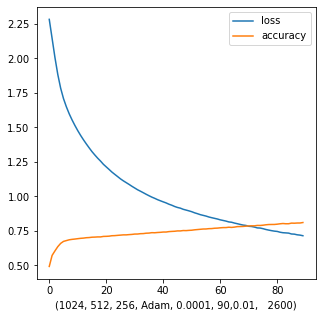

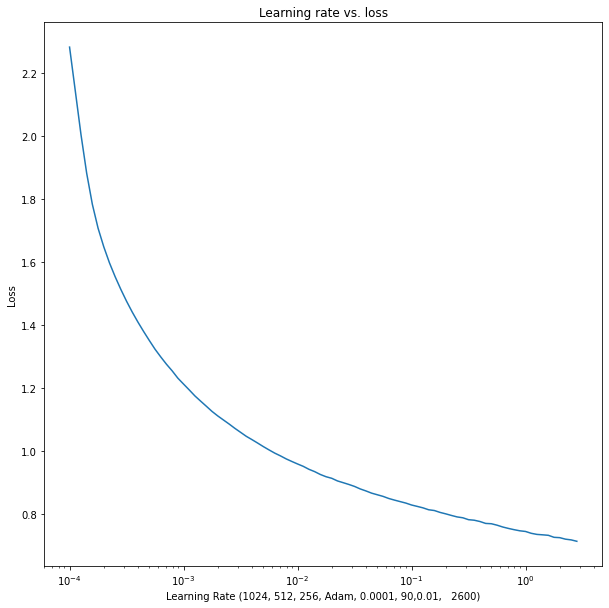

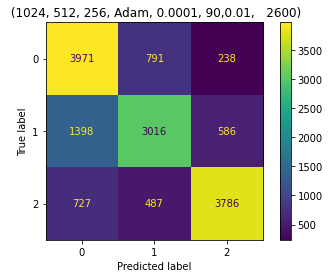

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.740688,0.727800,0.734187,5000
1,0.702375,0.603200,0.649021,5000
2,0.821258,0.757200,0.787929,5000
micro avg,0.755663,0.696067,0.724642,15000
macro avg,0.754774,0.696067,0.723713,15000
weighted avg,0.754774,0.696067,0.723713,15000
samples avg,0.696067,0.696067,0.696067,15000


In [ ]:
# Checkout the history
pd.DataFrame(m2_hist10.history).plot(figsize=(5,5), xlabel="(1024, 512, 256, Adam, 0.0001, 90,0.01,   2600)");
calc_learning_vs_loss(m2_hist10, " (1024, 512, 256, Adam, 0.0001, 90,0.01,   2600)")
display_confusion_matrix(Y_val, tf.round(m2_y_preds10).numpy(), " (1024, 512, 256, Adam, 0.0001, 90,0.01,   2600)")
#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(Y_val, 
                                        tf.round(m2_y_preds10).numpy(), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis')

Below are the plots for **SGD Optimizer** which are observed with best **ACCURACY** for ***Model 2***

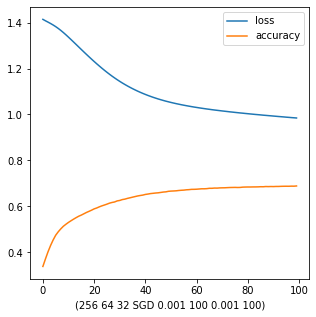

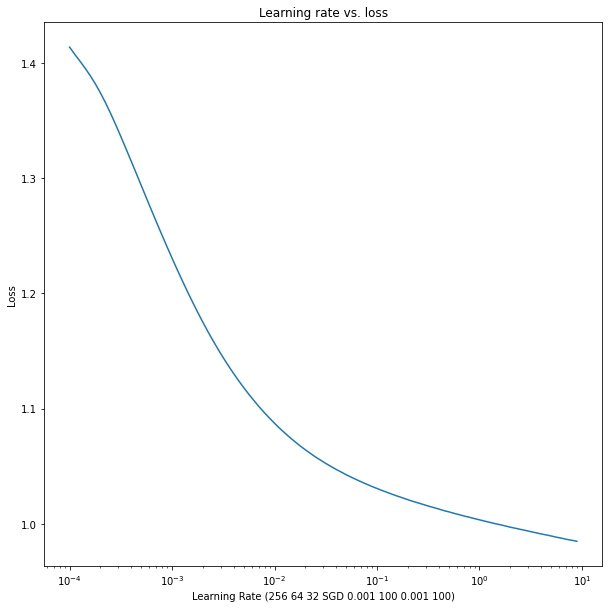

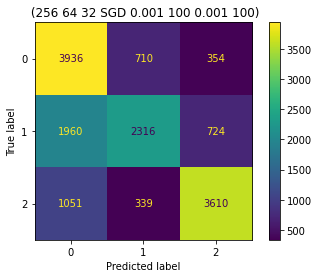

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.726240,0.626600,0.672751,5000
1,0.688262,0.463200,0.553736,5000
2,0.770051,0.722000,0.745252,5000
micro avg,0.732514,0.603933,0.662038,15000
macro avg,0.728184,0.603933,0.657246,15000
weighted avg,0.728184,0.603933,0.657246,15000
samples avg,0.603933,0.603933,0.603933,15000


In [ ]:
# Checkout the history
pd.DataFrame(m2_hist20.history).plot(figsize=(5,5), xlabel="(256 64 32 SGD 0.001 100 0.001 100)");
calc_learning_vs_loss(m2_hist20, " (256 64 32 SGD 0.001 100 0.001 100)")
display_confusion_matrix(Y_val, tf.round(m2_y_preds20).numpy(), " (256 64 32 SGD 0.001 100 0.001 100)")
#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(Y_val, 
                                        tf.round(m2_y_preds20).numpy(), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis')

### **Results Remarks of Model 2** 
The best result observed in various execution of model with various attributes & parameters. In this analysis we have got the best of result with following configuration/parameters
1. **Adam Optimizer**
> * Hidden Layer combination is **L1: 1024, L2:512, L3:256**
> * Learning rate: 0.0001
> * Epochs: 90
> * L2 Regularization: 0.01
> * Batch size: 2600
> * **ACCURACY**: 73.16%

2. **SGD**
> * Hidden Layer combination is **L1: 256, L2:64, L3:32** 
> * Learning rate: 0.001
> * Epochs: 100
> * L2 Regularization: 0.001
> * Batchsize: 100
> * **ACCURACY**: 68.35%



# **CONCLUSION OF MODEL 2**

After various execution of epochs & different optimizer & learning rate we have observed.

1. Learning rate is crucial part with all optimizer and epochs
2. This is not necessary that by increasing number of epochs only, we will get better accuracy in the model.
3. Combination of optimizers, learning rate and epochs impacts the model accuracy.
4. L2 regularization also used to optimizes the mean cost which is often used as a performance measurement. This is especially good if you know you don't have any outliers and you want to keep the overall error small

So far, it is observed for ***Model 2*** with additional configuration of explicit L2 regularization in comparison of Model 1, is giving better accuracy with especially for Adam optimzwer with varying attributes as mentioned above. 
Although, the structure of neural network is varied in terms neuron at each layer including the change in learning rate, batchsize and epochs & regularization.

We have observed that most of time Adam optimizer is giving better result.

Although, *the study is limited and can be further explored by varying combination of attributes of the neural network*. To perform this kind of job we have to do various changes e.g.

* Change in no. of epochs
* Change in learning rate & bactch size
* Change in optimizers & L2 regularization
* Change in neurons count at each layer
* Change in hidden layers

---
---

## Below are the details and approach of MODEL 3

* **Model 3** 
  * Model 3 is a model containing 3 layers without regularization and with dropout to test the behaviour of input data. It helps to explore the data from different aspect
  * We are passing dynamic variable to methods created to perform modelling on **Model 3**
  * ***Based on the results we will be plotting information of attributes which will be having best performance*** 

In [ ]:
def model3(layer1, layer2, layer3, opt, lr, e, batchsiz, dropout):
  print("Performing for:", layer1, layer2, layer3, opt, lr, e, batchsiz, dropout)

  # Set random seed
  tf.random.set_seed(42)

  # Replicate original model
  model = tf.keras.Sequential([
       
    ## layer 1 with hidden nodes
    tf.keras.layers.Dense(layer1, activation="relu", input_shape=(128,)),

    ## layer 2 with hidden nodes
    tf.keras.layers.Dense(layer2, activation="relu"),

    ## layer 3 with "count" hidden nodes
    tf.keras.layers.Dense(layer3, activation="relu"),

    ## Remove this for dropout
    tf.keras.layers.Dropout(dropout),  

    ##output layer with binary clasification
    tf.keras.layers.Dense(3, activation="softmax") 
  ])

  if (opt == "Adam"):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

  # Compile the model #tf.keras.optimizers.Adam(learning_rate=0.003), 
  model.compile(loss="categorical_crossentropy",
                optimizer=optimizer, 
                metrics=["accuracy"])

  # Fit the model
  history = model.fit(X_train, Y_train, epochs=e, verbose=0, batch_size=batchsiz)

  # Evaluate model on the test dataset
  eval = model.evaluate(X_Val, Y_val)

  return history, model, eval

In [ ]:
m3_hist0A, m3_model0A, m3_eval0A = model3(128, 64, 32, "Adam", 0.0001, 50, 300, 0.15)
m3_hist0AA, m3_model0AA, m3_eval0AA = model3(128, 64, 32, "Adam", 0.0001, 50, 1000, 0.15 )

m3_hist1A, m3_model2A, m3_eval1A = model3(128, 64, 32, "SGD", 0.001, 30, 1500, 0.01)
m3_hist1AA, m3_model2AA, m3_eval1AA = model3(128, 64, 32, "SGD", 0.001, 30, 2000,0.01)

m3_hist2A, m3_model2A, m3_eval2A = model3(128, 32, 16, "Adam", 1, 10, 100, 0.19)
m3_hist2AA, m3_model2AA, m3_eval2AA = model3(128, 32, 16, "Adam", 1, 10, 2000, 0.19)

m3_hist3A, m3_model3A, m3_eval3A = model3(128, 32, 8, "SGD", 0.003, 100, 800, 0.003)
m3_hist3AA, m3_model3AA, m3_eval3AA = model3(128, 32, 8, "SGD", 0.003, 100, 1800, 0.003)

m3_hist4A, m3_model4A, m3_eval4A = model3(128, 64, 8, "SGD",  0.0001, 60, 1600, 0.001)
m3_hist4AA, m3_model4AA, m3_eval4AA = model3(128, 64, 8, "SGD",  0.0001, 60,  2600, 0.001)

Performing for: 128 64 32 Adam 0.0001 50 300 0.15
469/469 [==============================] - 1s 2ms/step - loss: 0.6602 - accuracy: 0.7131
Performing for: 128 64 32 Adam 0.0001 50 1000 0.15
469/469 [==============================] - 1s 1ms/step - loss: 0.6807 - accuracy: 0.7032
Performing for: 128 64 32 SGD 0.001 30 1500 0.01
469/469 [==============================] - 1s 2ms/step - loss: 1.0929 - accuracy: 0.3857
Performing for: 128 64 32 SGD 0.001 30 2000 0.01
469/469 [==============================] - 1s 1ms/step - loss: 1.0944 - accuracy: 0.3761
Performing for: 128 32 16 Adam 1 10 100 0.19
469/469 [==============================] - 1s 1ms/step - loss: 1.1027 - accuracy: 0.3333
Performing for: 128 32 16 Adam 1 10 2000 0.19
469/469 [==============================] - 1s 1ms/step - loss: 1.0998 - accuracy: 0.3333
Performing for: 128 32 8 SGD 0.003 100 800 0.003
469/469 [==============================] - 1s 1ms/step - loss: 0.9342 - accuracy: 0.5851
Performing for: 128 32 8 SGD 0.003 100

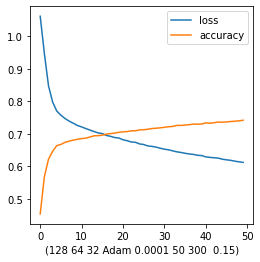

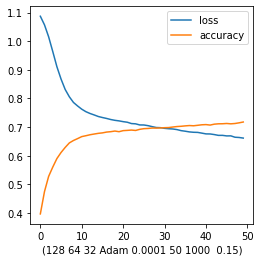

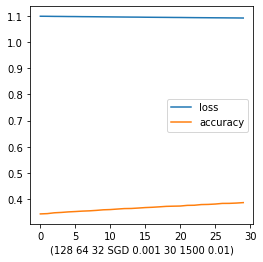

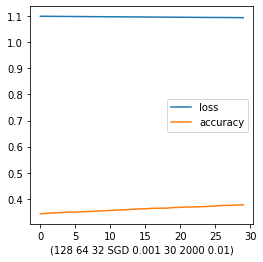

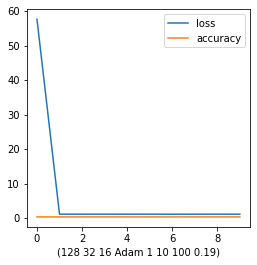

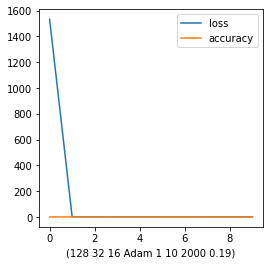

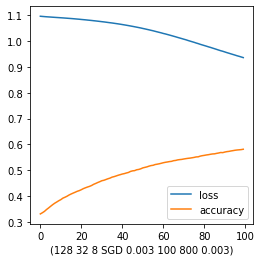

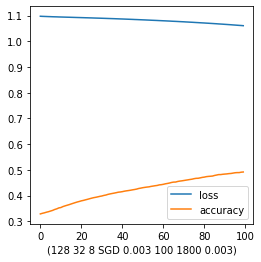

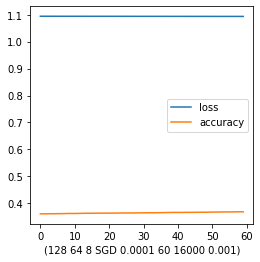

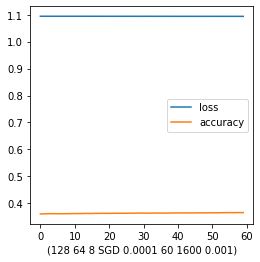

In [ ]:
pd.DataFrame(m3_hist0A.history).plot(figsize=(4,4), xlabel="(128 64 32 Adam 0.0001 50 300  0.15)");
pd.DataFrame(m3_hist0AA.history).plot(figsize=(4,4), xlabel="(128 64 32 Adam 0.0001 50 1000  0.15)");

pd.DataFrame(m3_hist1A.history).plot(figsize=(4,4), xlabel="(128 64 32 SGD 0.001 30 1500 0.01)");
pd.DataFrame(m3_hist1AA.history).plot(figsize=(4,4), xlabel="(128 64 32 SGD 0.001 30 2000 0.01)");

pd.DataFrame(m3_hist2A.history).plot(figsize=(4,4), xlabel="(128 32 16 Adam 1 10 100 0.19)");
pd.DataFrame(m3_hist2AA.history).plot(figsize=(4,4), xlabel="(128 32 16 Adam 1 10 2000 0.19)");

pd.DataFrame(m3_hist3A.history).plot(figsize=(4,4), xlabel="(128 32 8 SGD 0.003 100 800 0.003)");
pd.DataFrame(m3_hist3AA.history).plot(figsize=(4,4), xlabel="(128 32 8 SGD 0.003 100 1800 0.003)");

pd.DataFrame(m3_hist4A.history).plot(figsize=(4,4), xlabel="(128 64 8 SGD 0.0001 60 16000 0.001)");
pd.DataFrame(m3_hist4AA.history).plot(figsize=(4,4), xlabel="(128 64 8 SGD 0.0001 60 1600 0.001)");

In [ ]:
m3_hist0, m3_model0, m3_eval0 = model3(256, 128, 64, "Adam", 0.0001, 50, 2000, 0.15)
m3_hist1, m3_model1, m3_eval1 = model3(256, 128, 64, "Adam", 0.001, 30,100, 0.19)
m3_hist2, m3_model2, m3_eval2 = model3(256, 128, 64, "Adam", 1, 10,2600, 0.001)
m3_hist3, m3_model3, m3_eval3 = model3(256, 128, 64, "Adam", 0.003, 100,2600, 0.001)
m3_hist4, m3_model4, m3_eval4 = model3(512, 256, 64, "SGD",  0.0001, 60,100, 0.19)
m3_hist5, m3_model5, m3_eval5 = model3(256, 128, 64, "SGD",  0.001, 20,800, 0.003)
m3_hist6, m3_model6, m3_eval6 = model3(256, 128, 64, "SGD",  1, 30,800, 0.003)
m3_hist7, m3_model7, m3_eval7 = model3(256, 128, 64, "SGD",  0.003, 80,2600, 0.001)
m3_hist8, m3_model8, m3_eval8 = model3(256, 128, 64, "Adam", 0.001, 70, 2000, 0.15)
m3_hist9, m3_model9, m3_eval9 = model3(256, 128, 64, "SGD",  0.1, 60, 2600, 0.001)
m3_hist10, m3_model10, m3_eval10 = model3(1024, 512, 256, "Adam", 0.0001, 90, 2600, 0.001)
m3_hist11, m3_model11, m3_eval11 = model3(256, 128, 64, "Adam", 0.001, 40, 100, 0.19)
m3_hist12, m3_model12, m3_eval12 = model3(512, 128, 64, "Adam", 1, 100, 2600, 0.001)
m3_hist13, m3_model13, m3_eval13 = model3(256, 128, 64, "Adam", 0.003, 30,100, 0.19)
m3_hist14, m3_model14, m3_eval14 = model3(256, 128, 64, "SGD",  0.0001, 20,2600, 0.001)
m3_hist15, m3_model15, m3_eval15 = model3(128, 64, 32, "SGD",  0.001, 10,1800, 0.01)
m3_hist16, m3_model16, m3_eval16 = model3(256, 128, 64, "SGD",  0.01, 10, 100, 0.19)
m3_hist17, m3_model17, m3_eval17 = model3(256, 128, 64, "SGD",  0.003, 10,2000, 0.15)
m3_hist18, m3_model18, m3_eval18 = model3(256, 128, 64, "Adam", 0.1, 10, 1800, 0.01)
m3_hist19, m3_model19, m3_eval19 = model3(256, 128, 64, "SGD",  0.001, 10, 1800, 0.01)
m3_hist20,	m3_model20, m3_eval20 = model3( 256,64,32, "SGD", 0.001, 100, 1800, 0.01) 
m3_hist21,	m3_model21, m3_eval21 = model3( 512,128,32, "Adam", 0.001, 30,2000, 0.15)
m3_hist22,	m3_model22, m3_eval22 = model3( 256,64,32, "Adam", 0.001, 50,800, 0.003)
m3_hist23,	m3_model23, m3_eval23 = model3( 256,64,32, "SGD", 0.001, 70,100, 0.19)
m3_hist24,	m3_model24, m3_eval24 = model3( 256,64,32, "Adam", 0.001, 10,800, 0.003)
m3_hist25,	m3_model25, m3_eval25 = model3( 32,16,8, "SGD", 0.001, 80, 100, 0.19)
m3_hist26,	m3_model26, m3_eval26 = model3( 256,64,32, "Adam", 0.001, 90, 1800, 0.01)
m3_hist27,	m3_model27, m3_eval27 = model3( 1024,64,32, "SGD", 0.001, 100,800, 0.003)
m3_hist28,	m3_model28, m3_eval28 = model3( 256,64,32, "Adam", 0.001, 40,2000, 0.15)
m3_hist29,	m3_model29, m3_eval29 = model3( 1024,512,256, "SGD", 0.001, 100, 1800, 0.01)
m3_hist30,	m3_model30, m3_eval30 = model3( 256,64,32, "Adam", 0.001, 50,2000, 0.15)

Performing for: 256 128 64 Adam 0.0001 50 2000 0.15
469/469 [==============================] - 1s 2ms/step - loss: 0.6759 - accuracy: 0.7055
Performing for: 256 128 64 Adam 0.001 30 100 0.19
469/469 [==============================] - 1s 2ms/step - loss: 1.7234 - accuracy: 0.6893
Performing for: 256 128 64 Adam 1 10 2600 0.001
469/469 [==============================] - 1s 2ms/step - loss: 82.7524 - accuracy: 0.3333
Performing for: 256 128 64 Adam 0.003 100 2600 0.001
469/469 [==============================] - 1s 1ms/step - loss: 1.3285 - accuracy: 0.6929
Performing for: 512 256 64 SGD 0.0001 60 100 0.19
469/469 [==============================] - 1s 2ms/step - loss: 1.0525 - accuracy: 0.5113
Performing for: 256 128 64 SGD 0.001 20 800 0.003
469/469 [==============================] - 1s 2ms/step - loss: 1.0840 - accuracy: 0.4351
Performing for: 256 128 64 SGD 1 30 800 0.003
469/469 [==============================] - 1s 2ms/step - loss: 0.6699 - accuracy: 0.7037
Performing for: 256 128 64 

**Note** Learning acquired from model 3 will go here

Perform predictions on all the model 3 created above

In [ ]:
m3_y_preds0=m3_model0.predict(X_Val)
m3_y_preds1=m3_model1.predict(X_Val)
m3_y_preds2=m3_model2.predict(X_Val)
m3_y_preds3=m3_model3.predict(X_Val)
m3_y_preds4=m3_model4.predict(X_Val)
m3_y_preds5=m3_model5.predict(X_Val)
m3_y_preds6=m3_model6.predict(X_Val)
m3_y_preds7=m3_model7.predict(X_Val)
m3_y_preds8=m3_model8.predict(X_Val)
m3_y_preds9=m3_model9.predict(X_Val)
m3_y_preds10=m3_model10.predict(X_Val)
m3_y_preds11=m3_model11.predict(X_Val)
m3_y_preds12=m3_model12.predict(X_Val)
m3_y_preds13=m3_model13.predict(X_Val)
m3_y_preds14=m3_model14.predict(X_Val)
m3_y_preds15=m3_model15.predict(X_Val)
m3_y_preds16=m3_model16.predict(X_Val)
m3_y_preds17=m3_model17.predict(X_Val)
m3_y_preds18=m3_model18.predict(X_Val)
m3_y_preds19=m3_model19.predict(X_Val)
m3_y_preds20=m3_model20.predict(X_Val)
m3_y_preds21=m3_model21.predict(X_Val)
m3_y_preds22=m3_model22.predict(X_Val)
m3_y_preds23=m3_model23.predict(X_Val)
m3_y_preds24=m3_model24.predict(X_Val)
m3_y_preds25=m3_model25.predict(X_Val)
m3_y_preds26=m3_model26.predict(X_Val)
m3_y_preds27=m3_model27.predict(X_Val)
m3_y_preds28=m3_model28.predict(X_Val)
m3_y_preds29=m3_model29.predict(X_Val)
m3_y_preds30=m3_model18.predict(X_Val)

Plotting History, Learning v/s Loss and Confusion Matrix of Best Attributes used in neural network

Below are the plots for **Adam Optimizer** which are observed with best **ACCURACY for Model 3**

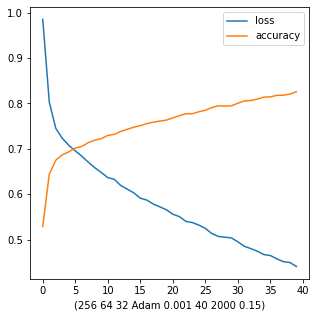

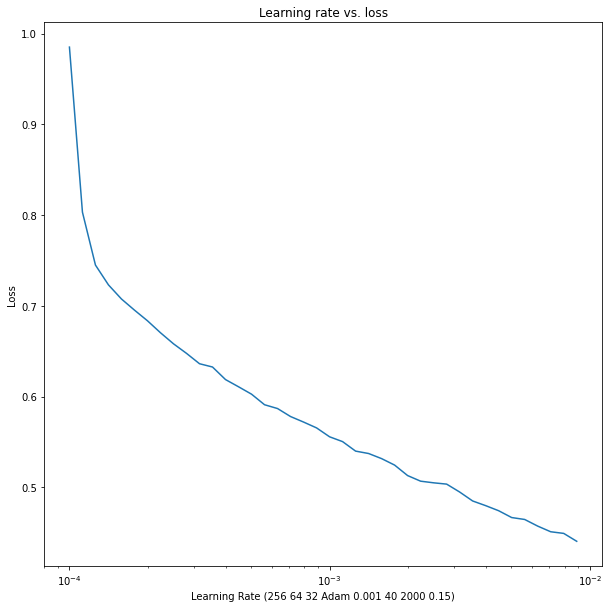

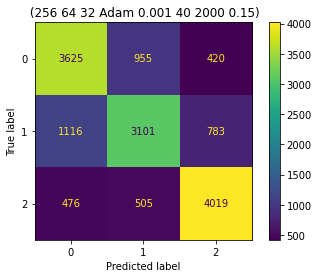

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.746830,0.683200,0.713599,5000
1,0.679895,0.620200,0.648677,5000
2,0.769628,0.803800,0.786343,5000
micro avg,0.733858,0.702400,0.717785,15000
macro avg,0.732118,0.702400,0.716206,15000
weighted avg,0.732118,0.702400,0.716206,15000
samples avg,0.702400,0.702400,0.702400,15000


In [ ]:
# Checkout the history
pd.DataFrame(m3_hist28.history).plot(figsize=(5,5), xlabel="(256 64 32 Adam 0.001 40 2000 0.15)");
calc_learning_vs_loss(m3_hist28, " (256 64 32 Adam 0.001 40 2000 0.15)")
display_confusion_matrix(Y_val, tf.round(m3_y_preds28).numpy(), " (256 64 32 Adam 0.001 40 2000 0.15)")
#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(Y_val, 
                                        tf.round(m3_y_preds28).numpy(), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis')

Below are the plots for **SGD Optimizer** which are observed with best **ACCURACY for Model 3**

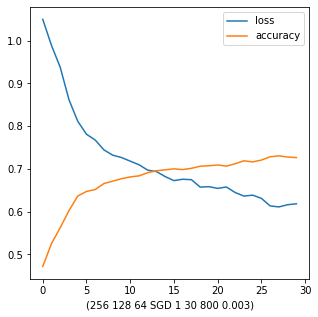

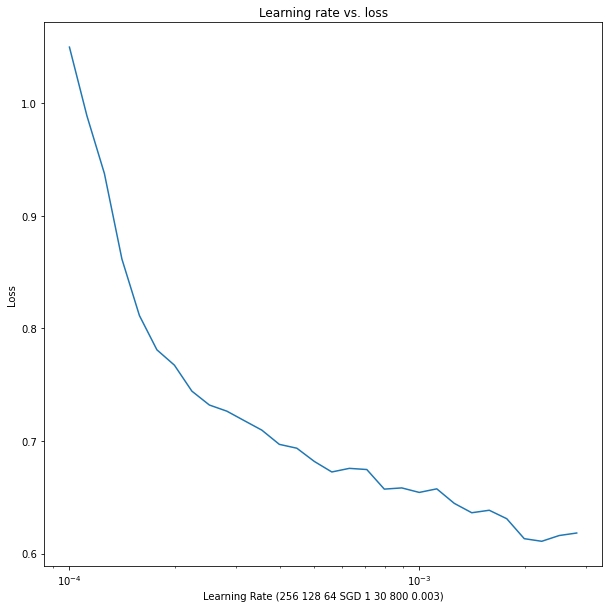

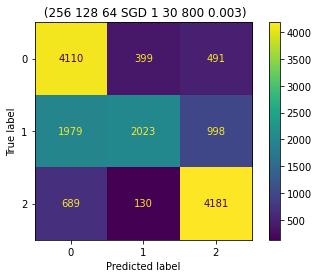

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.726882,0.710600,0.718649,5000
1,0.792712,0.404600,0.535752,5000
2,0.737390,0.836200,0.783693,5000
micro avg,0.744241,0.650467,0.694201,15000
macro avg,0.752328,0.650467,0.679365,15000
weighted avg,0.752328,0.650467,0.679365,15000
samples avg,0.650467,0.650467,0.650467,15000


In [ ]:
# Checkout the history
pd.DataFrame(m3_hist6.history).plot(figsize=(5,5), xlabel="(256 128 64 SGD 1 30 800 0.003)");
calc_learning_vs_loss(m3_hist6, " (256 128 64 SGD 1 30 800 0.003)")
display_confusion_matrix(Y_val, tf.round(m3_y_preds6).numpy(), " (256 128 64 SGD 1 30 800 0.003)")
#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(Y_val, 
                                        tf.round(m3_y_preds6).numpy(), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis')

### **Results Remarks of Model 3** 
The best result observed in various execution of model with various attributes & parameters. In this analysis we have got the best of result with following configuration/parameters
1. **Adam Optimizer**
> * Hidden Layer combination is **L1: 256, L2:64, L3:32**
> * Learning rate: 0.001
> * Epochs: 40
> * Dropout: 0.15
> * Batch size: 2000
> * **ACCURACY**: 72.04%

2. **SGD**
> * Hidden Layer combination is **L1: 256, L2:128, L3:64** 
> * Learning rate: 1
> * Epochs: 30
> * Dropout: 0.003
> * Batchsize: 800
> * **ACCURACY**: 70.37%



# **CONCLUSION OF MODEL 3**

After various execution of epochs & different optimizer & learning rate we have observed.

1. Learning rate is crucial part with all optimizer and epochs
2. This is not necessary that by increasing number of epochs only, we will get better accuracy in the model.
3. Combination of optimizers, learning rate and epochs impacts the model accuracy.
4. ***Dropout is used at Layer 2***, although, we use dropout for big neural network where training data is giving very high accuracy. This high accuracy leads to the overfitting of the model. **To reduce this overfitting we apply drop out on various layers to reduce the input of neurons from previous layer. Although, in our case overfitting on training data is not observed. But it is used to retain the concept to maintain the accuracy acquired in previous model**

So far, it is observed for ***Model 3*** with additional configuration of explicit dropout at layer 2 in comparison of Model 1 & Model 2, is giving slighter less accuracy with for Adam/SGD optimzwer with varying attributes as mentioned above. 
Although, the structure of neural network is varied in terms neuron at each layer including the change in learning rate, batchsize and epochs & dropout.

We have observed that most of time Adam optimizer is giving better result.

Although, *the study is limited and can be further explored by varying combination of attributes of the neural network*. To perform this kind of job we have to do various changes e.g.

* Change in no. of epochs
* Change in learning rate & batch size
* Change in optimizers & Dropout value & position
* Change in neurons count at each layer
* Change in hidden layers

---
---
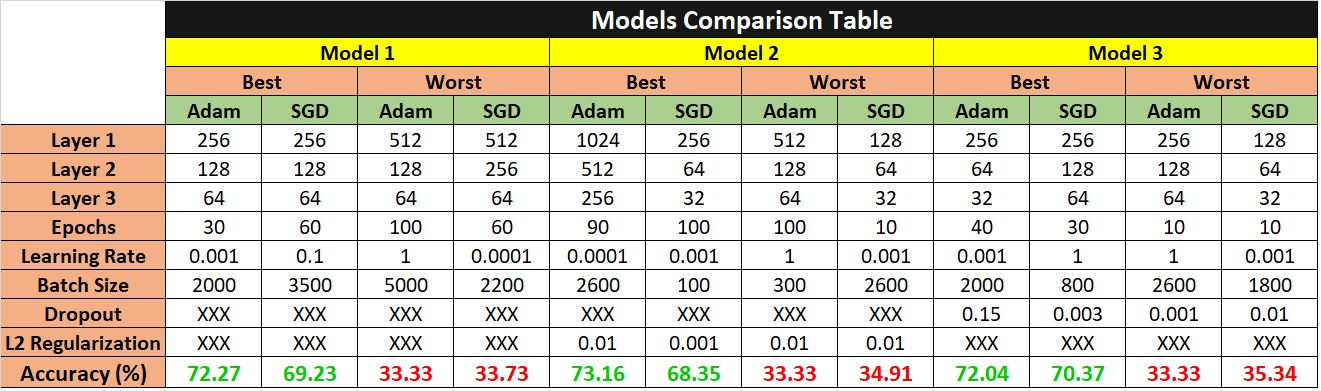

1. **How many number of neurons in hidden Layer**

* There are various rule of thumb and theories to determine the number of neurons in hidden layer.
* In our case from R&D perspective we decided to use various values from a limited count to 1024, to learn and understand the behaviour of neurons.
* We observed that increase count of neurons doesn't make the network robust enough to produce better result or accuracy.

2. **EPOCHS & Batch Size**
* An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large).
* We used various epochs and batch size to understand the behaviour of network. We observed that increased number of epochs and batchsize are not alone the factor to produce greate results.

3. **Learning Rate**
* The amount that the weights are updated during training is referred to as learning rate.
* There are multiple ways to select a good starting point for the learning rate. A naive approach is to try a few different values and see which one gives you the best loss without sacrificing speed of training. We starte with a large value like 0.1, then try exponentially lower values: 0.01, 0.001, etc. and the best result based on the combinations of various factor are mentioned in above result comparison table

4. **L2 Regularization**
* The most common type of regularization is L2, also called simply “weight decay,” with values often on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc. We tested various values with difference combinations and best result is mentioned above.

5. **Droupout**
* Generally we use dropout to avoid overfitting of the model if network is very huge. Although in our case we are testing with limited size of network. Therefore, the real use case of the usage of dropout values might not be visible clearly. But, as we know that with dropout, the accuracy will gradually increase and loss will gradually decrease first. When you increase dropout beyond a certain threshold, it results in the model not being able to fit properly.

6. **BEST MODEL CONSIDERED FOR DEPLOYMENT IS MODEL 2 with Adam Optimizer**

Reference: https://playground.tensorflow.org/



